In [19]:
#ニューラルネットワークモデル(基礎編)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.stats import chi2_contingency

In [20]:
a=np.array([0,1])
b=np.array([2,3])
np.dot(a,b)  #内積計算

np.int64(3)

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


In [22]:
bc = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.3)

In [23]:
#説明変数3つでニューラルネットワークモデルを作成する
X_train3 = X_train[:, :3]
X_test3 = X_test[:, :3]
print(X_train3.shape)
print(X_test3.shape)

(398, 3)
(171, 3)


In [24]:
model = Sequential()
model.add(Dense(2,input_shape=(3,),activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
result = model.fit(
    X_train3,
    y_train, 
    epochs=300, 
    batch_size=32)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6080 - loss: 16.6345  
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 15.8490
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 15.0534 
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 14.3523 
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 13.6160 
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 12.9416 
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 12.2587 
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 11.6283 
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 11.0135 
Epoch 10/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 10.4256 
Epoch 11/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6080 - loss: 9.8602  
Epoch 12/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

Text(0.5, 1.0, '正解率の推移')

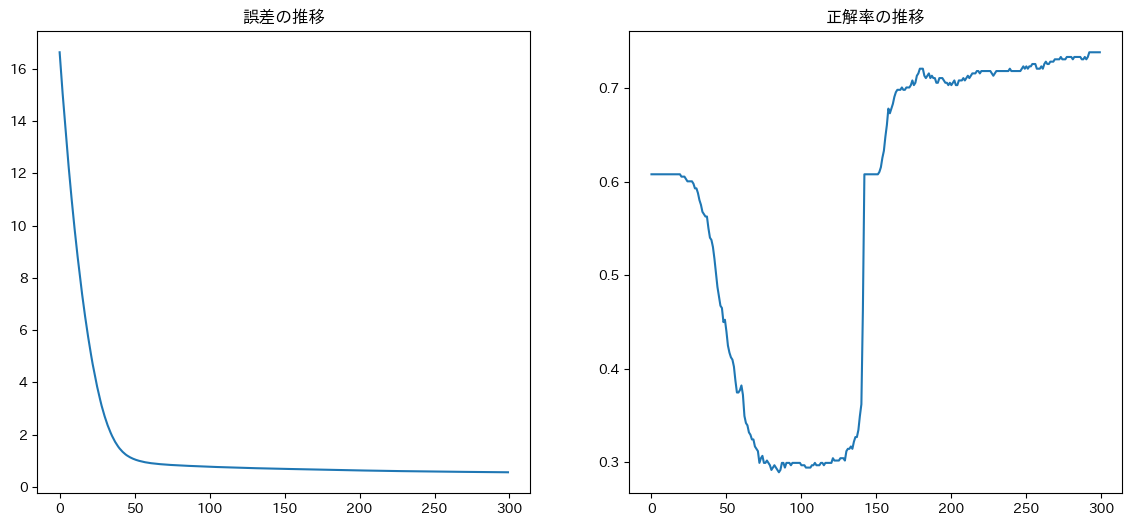

In [26]:
# figure()でグラフを表示する領域をつくり，figというオブジェクトにする．
fig = plt.figure(figsize=(14,6))

# add_subplot()でグラフを描画する領域を追加する．引数は行，列，場所
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(result.history['loss'])
ax1.set_title('誤差の推移')
ax2.plot(result.history['accuracy'])
ax2.set_title('正解率の推移')

In [27]:
prediction=model.predict(X_test3)
predicted_classes = (prediction > 0.5).astype(int).flatten()

print("予測値:", predicted_classes)
print("正解値:", y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
予測値: [1 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0]
正解値: [0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1
 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0]


In [28]:
test_df = pd.DataFrame({'予測値':predicted_classes,'正解値':y_test})
cross_df=pd.crosstab(index=test_df['正解値'], columns=test_df['予測値'], rownames=['実際'], colnames=['予測']) 
cross_df=cross_df.reindex(columns=[1, 0], index=[1, 0])
cross_df

予測,1,0
実際,,
1,92,23
0,21,35


In [29]:
# 作成したクロス集計表を関数に渡す
chi2, p, dof, expected = chi2_contingency(cross_df)
print("カイ二乗値:", chi2)
print("p値:", p)
print("自由度:", dof)
print("期待度数:\n", expected)

カイ二乗値: 28.48308781963317
p値: 9.452052800839828e-08
自由度: 1
期待度数:
 [[75.99415205 39.00584795]
 [37.00584795 18.99415205]]


In [30]:
# クロス集計表から各セルの値を取得
A = cross_df.loc[1, 1]
B = cross_df.loc[1, 0]
C = cross_df.loc[0, 1]
D = cross_df.loc[0, 0]

# オッズ比の計算
odds_ratio = (A * D) / (B * C)
print(f'オッズ比: {odds_ratio}')

オッズ比: 6.666666666666667


In [31]:
evalate_loss, evalate_acctuary = model.evaluate(X_test3, y_test)
print("評価用データでの損失率:", evalate_loss)
print("評価用データでの正解率:", evalate_acctuary)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7427 - loss: 0.5472 
評価用データでの損失率: 0.5471822023391724
評価用データでの正解率: 0.7426900863647461


In [32]:
#学習モデルを改良したモデルを作成する
model2 = Sequential()